# Phase IV Fatima Work

In [3]:
# Load libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
sqf2011= pd.read_csv('sqf2011_final_sample')
sqf2019= pd.read_csv('sqf2019_final_sample')

In [59]:
sqf2011copy1 = sqf2011.copy()
sqf2019copy1 = sqf2019.copy()

## Defining Functions

### a) Logistic Regression Prediction Accuracy Function:

In [231]:
def LogR(logdf, getbinary, targetvar):
    """ creates a df with only vars of interest with indicator variables, runs a logistic regression on that and returns a prediction accuracy percentage.
    logdf is a df with only the variables in interest for logistic regression. 
    targetvar is a string of the target variable for the logistic regression.
    getbinary is a dataframe with columns that need to be given indicator variables and will then be added on to the logistic_data df.
   
    input_cols = list(getbinary.columns)
    for col in input_cols:   # get dummies for each predictor variable and add to df
         logdf = pd.concat(
            [
                logdf, 
                pd.get_dummies(getbinary[col], prefix=col)
            ]
            , axis='columns'
        )          """
    newgetbinary = pd.get_dummies(getbinary)
    newlogdf = pd.concat([logdf, newgetbinary], axis=1)
    
    predictors = list(newlogdf.columns)
    predictors.remove(targetvar)
    train,test = train_test_split(newlogdf, test_size=0.2, random_state=15)
    logmod = LogisticRegression();
    logmod.fit(train[predictors], train[targetvar])
    tepreds=logmod.predict(test[predictors])
    return "the prediction accuracy as a percentage is {:.1f}.".format(np.sum(tepreds==test[targetvar])/len(tepreds)*100)   

### b) Predictors Coefficients Function:

In [239]:
def coeffs(logdf, getbinary, targetvar): 
    """Prints a list of coefficients and displays a plot of the coefficents in descedning order o.
    input_cols = list(getbinary.columns)
    for col in input_cols:   # get dummies for each predictor variable and add to df
         logdf = pd.concat(
            [
                logdf, 
                pd.get_dummies(getbinary[col], prefix=col)
            ]
            , axis='columns'
        )          """
    newgetbinary = pd.get_dummies(getbinary)
    newlogdf = pd.concat([logdf, newgetbinary], axis=1)
    
    predictors = list(newlogdf.columns);
    predictors.remove(targetvar);
    train,test = train_test_split(newlogdf, test_size=0.2, random_state=15);
    logmod = LogisticRegression();
    logmod.fit(train[predictors], train[targetvar]);
    
    # print the coefficients legibly
    for i, predictor in enumerate(predictors):
        print(f'{logmod.coef_[0,i]:.3f}\t{predictor}')

    # plot predictors by lean
    df = pd.DataFrame({'coef':logmod.coef_[0]}, index=predictors)
    df.sort_values(by='coef').plot.barh(legend=False);

## Logistic Regression Models

### Frisked (2011)

In [232]:
flogdf2011 = sqf2011copy1[['frisked', 'obs_duration', 'age']]  # first, just the 'frisked', 'obs_duration', 'age' columns
fgetbinary2011 = sqf2011copy1[['sex', 'race', 'boro']]
print("Using the model to predict whether one is frisked in the 2011 test set:")
LogR(flogdf2011, fgetbinary2011, 'frisked')

Using the model to predict whether one is frisked in the 2011 test set:


C:\Users\fatim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'the prediction accuracy as a percentage is 62.0.'

Based on the Chi square tests all the predictor vairbales have a statistically significant association with whether someone is Frisked in 2011.

C:\Users\fatim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-0.004	obs_duration
-0.019	age
-0.491	sex_FEMALE
0.451	sex_MALE
0.216	sex_UNKNOWN
0.011	race_AMERICAN INDIAN/ALASKAN NATIVE
-0.218	race_ASIAN/PACIFIC ISLANDER
0.266	race_BLACK
0.173	race_BLACK HISPANIC
-0.011	race_UNKNOWN
-0.175	race_WHITE
0.130	race_WHITE HISPANIC
0.412	boro_BRONX
-0.173	boro_BROOKLYN
-0.106	boro_MANHATTAN
0.293	boro_QUEENS
-0.250	boro_STATEN IS


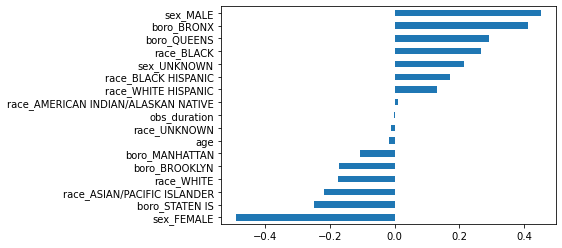

In [240]:
coeffs(flogdf2011, fgetbinary2011, 'frisked')

According to the plot, the four most influential variables on getting frisked are being a male, being in the Bronx or Queens, and being black.

## Frisked 2019

In [180]:
flogdf2019 = sqf2019copy1[['frisked', 'obs_duration', 'age']]  # first, just the 'frisked', 'obs_duration', 'age' columns
fgetbinary2019 = sqf2019copy1[['sex', 'race', 'boro']]
print("Using the model to predict whether one is frisked in the 2019 test set:")
LogR(flogdf2019, fgetbinary2019, 'frisked')

Using the model to predict whether one is frisked in the 2019 test set:


C:\Users\fatim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'The prediction accuracy as a percentage is 64.0.'

## Optimized Frisked 2019

Based on our chi squared tests, sex, race and boro have a statistically significant association with whether someone is frisked in 2019. 

In [241]:
optflogdf2019 = sqf2019copy1[['frisked']]
optfgetbinary2019 = sqf2019copy1[['sex', 'race', 'boro']]
print("Using the *optimized* model to predict whether one is frisked in the 2019 test set:")
LogR(optflogdf2019, optfgetbinary2019, 'frisked')

Using the *optimized* model to predict whether one is frisked in the 2019 test set:


'the prediction accuracy as a percentage is 62.2.'

-0.322	sex_FEMALE
0.612	sex_MALE
-0.292	sex_UNKNOWN
-0.017	race_AMERICAN INDIAN/ALASKAN N
-0.148	race_ASIAN / PACIFIC ISLANDER
0.162	race_BLACK
-0.048	race_BLACK HISPANIC
0.101	race_UNKNOWN
-0.211	race_WHITE
0.158	race_WHITE HISPANIC
0.491	boro_BRONX
0.278	boro_BROOKLYN
-0.143	boro_MANHATTAN
-0.091	boro_QUEENS
-0.538	boro_STATEN ISLAND


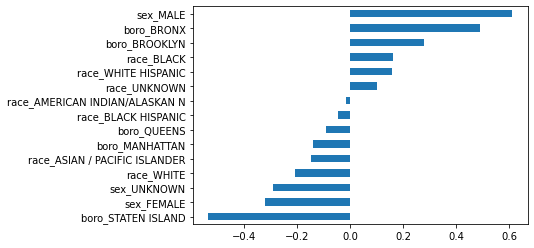

In [242]:
coeffs(optflogdf2019, optfgetbinary2019, 'frisked')

According to the plot, the four variables with the most impact on whether one is frisked in 2019 are being a male, being in the Bronx or Brooklyn, and being black.

## Searched 2011

In [234]:
slogdf2011 = sqf2011copy1[['searched', 'obs_duration', 'age']]  # first, just the 'searched', 'obs_duration', 'age' columns
sgetbinary2011 = sqf2011copy1[['sex', 'race', 'boro']]
LogR(slogdf2011, sgetbinary2011, 'searched')

C:\Users\fatim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'the prediction accuracy as a percentage is 91.6.'

## Optimized Searched 2011

Based on our chi-squared tests, sex, race, and boro have a statistically significant association with whether one is searched in 2011.

In [235]:
soptlogdf2011 = sqf2011copy1[['searched']]  # first, just the 'searched'
soptgetbinary2011 = sqf2011copy1[['sex', 'race', 'boro']]
print("Using the *optimized* model to predict whether one is searched in the 2011 test set:")
LogR(soptlogdf2011, soptgetbinary2011, 'searched')

Using the *optimized* model to predict whether one is searched in the 2011 test set:


'the prediction accuracy as a percentage is 91.6.'

-0.016	sex_FEMALE
0.128	sex_MALE
-0.108	sex_UNKNOWN
-0.054	race_AMERICAN INDIAN/ALASKAN NATIVE
0.066	race_ASIAN/PACIFIC ISLANDER
0.067	race_BLACK
-0.091	race_BLACK HISPANIC
-0.183	race_UNKNOWN
0.163	race_WHITE
0.036	race_WHITE HISPANIC
0.025	boro_BRONX
-0.226	boro_BROOKLYN
0.110	boro_MANHATTAN
0.168	boro_QUEENS
-0.073	boro_STATEN IS


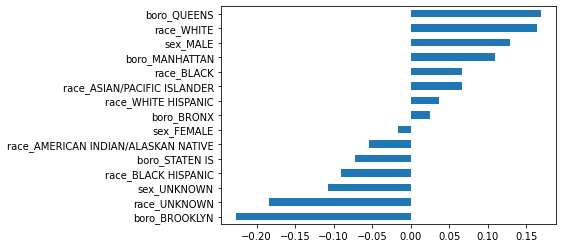

In [243]:
coeffs(soptlogdf2011, soptgetbinary2011, 'searched')

According to the plot, the four variables with the most impact on whether one is searched in 2011 are being being in Queens, being White, being a male, and being in Manhattan.

## Seached 2019

In [245]:
slogdf2019 = sqf2019copy1[['searched', 'obs_duration', 'age']]  # first, just the 'searched', 'obs_duration', 'age' columns
sgetbinary2019 = sqf2019copy1[['sex', 'race', 'boro']]
LogR(slogdf2019, sgetbinary2019, 'searched')

C:\Users\fatim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'the prediction accuracy as a percentage is 58.9.'

C:\Users\fatim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.010	obs_duration
0.002	age
-0.008	sex_FEMALE
0.233	sex_MALE
-0.788	sex_UNKNOWN
0.195	race_AMERICAN INDIAN/ALASKAN N
0.093	race_ASIAN / PACIFIC ISLANDER
0.113	race_BLACK
0.053	race_BLACK HISPANIC
-1.167	race_UNKNOWN
0.003	race_WHITE
0.147	race_WHITE HISPANIC
-0.197	boro_BRONX
-0.133	boro_BROOKLYN
-0.168	boro_MANHATTAN
-0.121	boro_QUEENS
0.057	boro_STATEN ISLAND


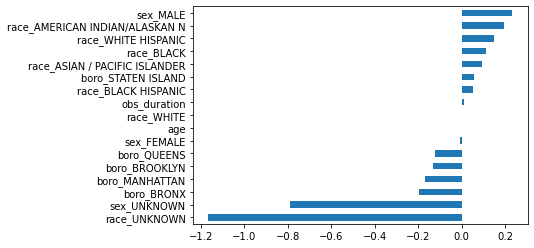

In [248]:
# *doing this just because im curious to see the coefficients of the other variables.. bc in the chi-sq test, sex was the only signicant variable - Fatima*
coeffs(slogdf2019, sgetbinary2019, 'searched')

## Optimized Searched 2019

Based on chi squared tests, sex has a statistically significant association with whether someone is searched through the stop and frisk program in 2019. 

In [246]:
optslogdf2019 = sqf2019copy1[['searched']]  # first, just the 'searched'
optsgetbinary2019 = sqf2019copy1[['sex']]
print("Using the *optimized* model to predict whether one is searched in the 2019 test set:")
LogR(optslogdf2019, optsgetbinary2019, 'searched')

Using the *optimized* model to predict whether one is searched in the 2019 test set:


'the prediction accuracy as a percentage is 59.3.'

0.295	sex_FEMALE
0.522	sex_MALE
-0.818	sex_UNKNOWN


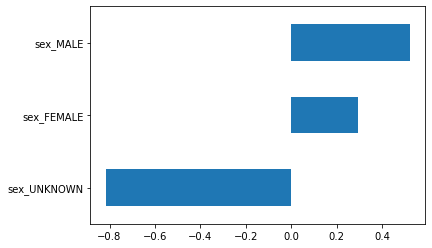

In [247]:
coeffs(optslogdf2019, optsgetbinary2019, 'searched')

According to the plot, being a male is what has the most impact on whether one is searched in 2019.

## Arrest Made 2011

In [191]:
amlogdf2011 = sqf2011copy1[['arstmade', 'obs_duration', 'age']]  # first, just the 'arstmade', 'obs_duration', 'age' columns
amgetbinary2011 = sqf2011copy1[['sex', 'race', 'boro']]
LogR(amlogdf2011, amgetbinary2011, 'arstmade')

C:\Users\fatim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'The prediction accuracy as a percentage is 93.7.'

## Optimized Arrest Made 2011

Based on the chi-squared test, sex, race, and boro have a statisitcally significant association with whether one is arrested throug stop and frisk program in 2011.

In [192]:
optamlogdf2011 = sqf2011copy1[['arstmade']]  # first, just the 'arstmade'
optamgetbinary2011 = sqf2011copy1[['sex', 'race', 'boro']]
print("Using the *optimized* model to predict whether one is arrested in the 2011 test set:")
LogR(optamlogdf2011, optamgetbinary2011, 'arstmade')

Using the *optimized* model to predict whether one is arrested in the 2011 test set:


'The prediction accuracy as a percentage is 93.7.'

0.378	sex_FEMALE
-0.020	sex_MALE
-0.360	sex_UNKNOWN
0.269	race_AMERICAN INDIAN/ALASKAN NATIVE
-0.036	race_ASIAN/PACIFIC ISLANDER
0.042	race_BLACK
-0.121	race_BLACK HISPANIC
-0.231	race_UNKNOWN
0.128	race_WHITE
-0.053	race_WHITE HISPANIC
-0.020	boro_BRONX
-0.312	boro_BROOKLYN
0.366	boro_MANHATTAN
0.030	boro_QUEENS
-0.065	boro_STATEN IS


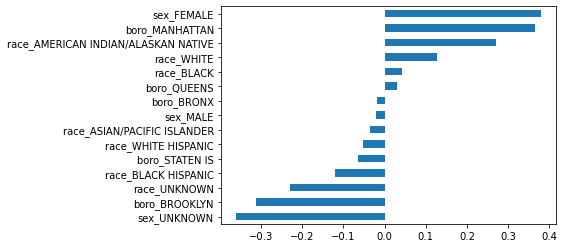

In [249]:
coeffs(optamlogdf2011, optamgetbinary2011, 'arstmade')

According to the plot, the four variables that have the most impact on whether one is arrested through a stop and frisk in 2011 are being female, being in Manhattan, being American Indian/Alaskan Native, and being white.

## Arrest Made 2019

In [194]:
amlogdf2019 = sqf2019copy1[['arstmade', 'obs_duration', 'age']]  # first, just the 'arstmade', 'obs_duration', 'age' columns
amgetbinary2019 = sqf2019copy1[['sex', 'race', 'boro']]
LogR(amlogdf2019, amgetbinary2019, 'arstmade')

C:\Users\fatim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'The prediction accuracy as a percentage is 63.6.'

Based on the chi-squared tests, none of the predictor variables have a statistically significant association with whether one is arrested thorugh the stop and frisk program in 2019.

C:\Users\fatim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.001	obs_duration
-0.004	age
-0.078	sex_FEMALE
-0.288	sex_MALE
0.113	sex_UNKNOWN
0.246	race_AMERICAN INDIAN/ALASKAN N
-0.321	race_ASIAN / PACIFIC ISLANDER
0.128	race_BLACK
-0.108	race_BLACK HISPANIC
-0.293	race_UNKNOWN
0.064	race_WHITE
0.030	race_WHITE HISPANIC
-0.206	boro_BRONX
-0.212	boro_BROOKLYN
0.020	boro_MANHATTAN
-0.051	boro_QUEENS
0.196	boro_STATEN ISLAND


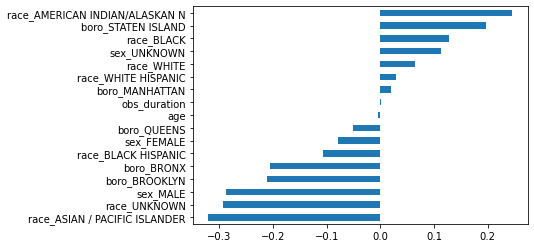

In [250]:
coeffs(amlogdf2019, amgetbinary2019, 'arstmade')

According to the plot, the variables with the most influence on whether one is arrested through stop and frisk in 2019 are being American Indian/Alaskan Native, being in Staten Island, and being black.